In [6]:
#Given there is missing context and information, I have had to somewhat deduce via assumptions and probability, as opposed to sheer confident deterministic analysis 


#THIS PROJECT: Takes a dataset from a company CRM system and attempts to analyse the data to make recommendations as to which regions are best suited to promotional schemes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#First to perform some exploratory data analysis
#Prepared data has null rows removed, and item volumes combined
prepared_data = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\GRAYCE prepared_data.csv')

In [7]:
prepared_data

,TRANS_ID,MONTH,VALUE,NO_OF_ITEMS,TAX,ITEM_VOL,LOYALTY,LOYALTY_ID,REGION,CUST_REGION,CUST_AREA,DISCOUNT_CODE,DELIVERY_DATE,DELIVERY_METHOD,DELIVERY_COST,TOTAL_COST
0,3632,Jan-19,92.51,0,NaN,12,N,9.86,GL,GL,GL,NaN,Jan-19,PAID,1.99,94.50
1,3646,Jan-19,18.92,0,NaN,5,N,3.16,NW,NW,NW,NaN,Jan-19,PAID,1.99,20.91
2,3651,Jan-19,70.95,0,NaN,5,N,9.82,WM,WM,WM,NaN,Jan-19,PAID,1.99,72.94
3,3662,Jan-19,7.54,0,NaN,7,N,0.12,SC,SC,SC,NaN,Jan-19,PAID,1.99,9.53
4,3669,Jan-19,11.32,0,22.00,2,Y,2.26,WM,WM,WM,NaN,Jan-19,FREE,0.00,11.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13581,Dec-19,30.08,0,0.00,4,Y,62.00,NW,NW,NW,NaN,Dec-19,FREE,0.00,30.08
496,13582,Dec-19,86.73,0,0.00,4,N,NaN,SW,SW,SW,NaN,Dec-19,PAID,1.99,88.72
497,13593,Dec-19,51.91,0,0.00,7,Y,142.00,EM,EM,EM,NaN,Dec-19,FREE,0.00,51.91
498,13598,Dec-19,58.54,0,9.82,8,N,NaN,SE,SE,SE,NaN,Dec-19,PAID,1.99,60.53


In [8]:
#Just some exploratory data analysis now

stats = {'Month':  ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 'Order_Quantity':  [0,0,0,0,0,0,0,0,0,0,0,0],
        'Item_Quantity': [0,0,0,0,0,0,0,0,0,0,0,0],
        'Total Order Value': [0,0,0,0,0,0,0,0,0,0,0,0]}

stats_df = pd.DataFrame(stats)
stats_df

,Month,Order_Quantity,Item_Quantity,Total Order Value
0,January,0,0,0
1,Febuary,0,0,0
2,March,0,0,0
3,April,0,0,0
4,May,0,0,0
5,June,0,0,0
6,July,0,0,0
7,August,0,0,0
8,September,0,0,0
9,October,0,0,0


In [9]:
#for i in prepared_data['MONTH']:
#    if i == 'Jan-19':
 #       stats_df['Order_Quantity', 'January'] = stats_df['Order_Quantity', 'January'] + 1

In [10]:
Jan = prepared_data.apply(lambda x: True if x['MONTH'] == 'Jan-19' else False , axis=1)
# Count number of True in series
numOfJanRows = len(Jan[Jan == True].index)
numOfJanRows

16

In [11]:
#Jan

In [12]:
#Okay so this provides the quantity of orders in January (or roughly speaking, assuming a fair data sample, 500/15000th of the quantity of orders in January)

#Now just need to repeat the process across the different months 

def append_rows(df1, df2):
    Jan = df1.apply(lambda x: True if x['MONTH'] == 'Jan-19' else False , axis=1)
    # Count number of True in series
    numOfJanRows = len(Jan[Jan == True].index)
    
    JanV = df1.loc[df1['MONTH'] == 'Jan-19', 'ITEM_VOL'].sum()
    
    JanVal = df1.loc[df1['MONTH'] == 'Jan-19', 'VALUE'].sum()
    df2.at[0,'Total Order Value']=JanVal
    
    df2.at[0,'Order_Quantity']=numOfJanRows
    df2.at[0,'Item_Quantity']=JanV
    
    Feb = df1.apply(lambda x: True if x['MONTH'] == 'Feb-19' else False , axis=1)
    # Count number of True in series
    numOfFebRows = len(Feb[Feb == True].index)
    
    FebV = df1.loc[df1['MONTH'] == 'Feb-19', 'ITEM_VOL'].sum()
    
    FebVal = df1.loc[df1['MONTH'] == 'Feb-19', 'VALUE'].sum()
    df2.at[1,'Total Order Value']=FebVal
    
    df2.at[1,'Order_Quantity']=numOfFebRows
    df2.at[1,'Item_Quantity']=FebV
    
    Mar = df1.apply(lambda x: True if x['MONTH'] == 'Mar-19' else False , axis=1)
    # Count number of True in series
    numOfMarRows = len(Mar[Mar == True].index)
    
    MarV = df1.loc[df1['MONTH'] == 'Mar-19', 'ITEM_VOL'].sum()
    
    MarVal = df1.loc[df1['MONTH'] == 'Mar-19', 'VALUE'].sum()
    df2.at[2,'Total Order Value']=MarVal
    
    df2.at[2,'Order_Quantity']=numOfMarRows
    df2.at[2,'Item_Quantity']=MarV
    
    Apr = df1.apply(lambda x: True if x['MONTH'] == 'Apr-19' else False , axis=1)
    # Count number of True in series
    numOfAprRows = len(Apr[Apr == True].index)
    
    AprV = df1.loc[df1['MONTH'] == 'Apr-19', 'ITEM_VOL'].sum()
    
    AprVal = df1.loc[df1['MONTH'] == 'Apr-19', 'VALUE'].sum()
    df2.at[3,'Total Order Value']=AprVal
    
    df2.at[3,'Order_Quantity']=numOfAprRows
    df2.at[3,'Item_Quantity']=AprV
    
    May = df1.apply(lambda x: True if x['MONTH'] == 'May-19' else False , axis=1)
    # Count number of True in series
    numOfMayRows = len(May[May == True].index)
    
    MayV = df1.loc[df1['MONTH'] == 'May-19', 'ITEM_VOL'].sum()
    
    MayVal = df1.loc[df1['MONTH'] == 'May-19', 'VALUE'].sum()
    df2.at[4,'Total Order Value']=MayVal
    
    df2.at[4,'Order_Quantity']=numOfMayRows
    df2.at[4,'Item_Quantity']=MayV
    
    Jun = df1.apply(lambda x: True if x['MONTH'] == 'Jun-19' else False , axis=1)
    # Count number of True in series
    numOfJunRows = len(Jun[Jun == True].index)
    
    JunV = df1.loc[df1['MONTH'] == 'Jun-19', 'ITEM_VOL'].sum()
    
    JunVal = df1.loc[df1['MONTH'] == 'Jun-19', 'VALUE'].sum()
    df2.at[5,'Total Order Value']=JunVal
    
    df2.at[5,'Order_Quantity']=numOfJunRows
    df2.at[5,'Item_Quantity']=JunV
    
    Jul = df1.apply(lambda x: True if x['MONTH'] == 'Jul-19' else False , axis=1)
    # Count number of True in series
    numOfJulRows = len(Jul[Jul == True].index)
    
    JulV = df1.loc[df1['MONTH'] == 'Jul-19', 'ITEM_VOL'].sum()
    
    JulVal = df1.loc[df1['MONTH'] == 'Jul-19', 'VALUE'].sum()
    df2.at[6,'Total Order Value']=JulVal
    
    df2.at[6,'Order_Quantity']=numOfJulRows
    df2.at[6,'Item_Quantity']=JulV
    
    Aug = df1.apply(lambda x: True if x['MONTH'] == 'Aug-19' else False , axis=1)
    # Count number of True in series
    numOfAugRows = len(Aug[Aug == True].index)
    
    AugV = df1.loc[df1['MONTH'] == 'Aug-19', 'ITEM_VOL'].sum()
    
    AugVal = df1.loc[df1['MONTH'] == 'Aug-19', 'VALUE'].sum()
    df2.at[7,'Total Order Value']=AugVal
    
    df2.at[7,'Order_Quantity']=numOfAugRows
    df2.at[7,'Item_Quantity']=AugV
    
    Sep = df1.apply(lambda x: True if x['MONTH'] == 'Sep-19' else False , axis=1)
    # Count number of True in series
    numOfSepRows = len(Sep[Sep == True].index)
    
    SepV = df1.loc[df1['MONTH'] == 'Sep-19', 'ITEM_VOL'].sum()
    
    SepVal = df1.loc[df1['MONTH'] == 'Sep-19', 'VALUE'].sum()
    df2.at[8,'Total Order Value']=SepVal
    
    df2.at[8,'Order_Quantity']=numOfSepRows
    df2.at[8,'Item_Quantity']=SepV
    
    Oct = df1.apply(lambda x: True if x['MONTH'] == 'Oct-19' else False , axis=1)
    # Count number of True in series
    numOfOctRows = len(Oct[Oct == True].index)
    
    OctV = df1.loc[df1['MONTH'] == 'Oct-19', 'ITEM_VOL'].sum()
    
    OctVal = df1.loc[df1['MONTH'] == 'Oct-19', 'VALUE'].sum()
    df2.at[9,'Total Order Value']=OctVal
    
    df2.at[9,'Order_Quantity']=numOfOctRows
    df2.at[9,'Item_Quantity']=OctV
    
    Nov = df1.apply(lambda x: True if x['MONTH'] == 'Nov-19' else False , axis=1)
    # Count number of True in series
    numOfNovRows = len(Nov[Nov == True].index)
    
    NovV = df1.loc[df1['MONTH'] == 'Nov-19', 'ITEM_VOL'].sum()
    
    NovVal = df1.loc[df1['MONTH'] == 'Nov-19', 'VALUE'].sum()
    df2.at[10,'Total Order Value']=NovVal

    df2.at[10,'Order_Quantity']=numOfNovRows
    df2.at[10,'Item_Quantity']=NovV
    
    Dec = df1.apply(lambda x: True if x['MONTH'] == 'Dec-19' else False , axis=1)
    # Count number of True in series
    numOfDecRows = len(Dec[Dec == True].index)
    
    DecV = df1.loc[df1['MONTH'] == 'Dec-19', 'ITEM_VOL'].sum()
    
    DecVal = df1.loc[df1['MONTH'] == 'Dec-19', 'VALUE'].sum()
    df2.at[11,'Total Order Value']=DecVal
    
    df2.at[11,'Order_Quantity']=numOfDecRows
    df2.at[11,'Item_Quantity']=DecV
    
    return df2

    
    
    
    

In [13]:
#append_rows(prepared_data, stats_df)

#That function sums the rows to obtain the number of orders each month. Now to sum the total number of items for each month. In fact it makes more sense to just do it all inside one function.
#...As above

In [14]:
#First to try and sum the item volume

JQ = prepared_data.loc[prepared_data['MONTH'] == 'Jan-19', 'ITEM_VOL'].sum()

In [15]:
append_rows(prepared_data, stats_df)

,Month,Order_Quantity,Item_Quantity,Total Order Value
0,January,16,80,662
1,Febuary,15,82,455
2,March,27,142,1771
3,April,48,239,2058
4,May,59,300,3000
5,June,50,268,2249
6,July,40,205,1922
7,August,81,469,3495
8,September,37,207,1785
9,October,31,183,1763


In [16]:
#Lets take a look

#plt.plot(stats_df[‘Order_Quantity’], stats_df[‘Item_Quantity’], stats_df[‘Total Order Value’])

<AxesSubplot:>

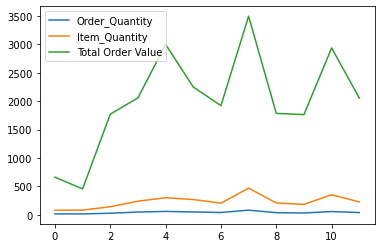

In [17]:
stats_df.plot.line()

<AxesSubplot:>

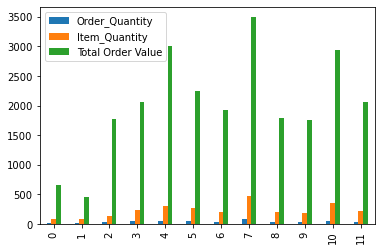

In [18]:
#Of course the above graph is not normalised, but jusy by looking at the Total Order Value, we can see the effect of expanding to different regions through 2019.
#A bar chart would be better as the data is bucketed

stats_df.plot.bar()

In [19]:
#First impressions, the order value(being arguably the best metric, but also should be considered wrt the products given, is it assumed that the products remain constant over the year)
#More context is needed in reality, does the ecommerce site specialise in for example summer products... etc Were different products sold at different points in the year?
#We would need the product codes provided for this. Unless there's some analysis to be done on the different products based on the quantities/order values etc

#It is difficult to distinguish the effect of expansion in general between the effects of the campaigns. Of course we can look at whether the promotion code has been used, but for now let's take a look at the above stats for the NW region that pre-existed.


NW_df = prepared_data

grouped = prepared_data.groupby(prepared_data.REGION)
df_NW = grouped.get_group("NW")

df_NW


,TRANS_ID,MONTH,VALUE,NO_OF_ITEMS,TAX,ITEM_VOL,LOYALTY,LOYALTY_ID,REGION,CUST_REGION,CUST_AREA,DISCOUNT_CODE,DELIVERY_DATE,DELIVERY_METHOD,DELIVERY_COST,TOTAL_COST
1,3646,Jan-19,18.92,0,NaN,5,N,3.160,NW,NW,NW,NaN,Jan-19,PAID,1.99,20.91
6,3672,Jan-19,26.51,0,39.0,4,Y,0.000,NW,NW,NW,NaN,Jan-19,FREE,0.00,26.51
12,3724,Jan-19,12.90,0,NaN,7,N,0.645,NW,NW,NW,NaN,Jan-19,PAID,1.99,14.89
13,3727,Jan-19,46.92,0,NaN,4,Y,9.380,NW,NW,NW,NaN,Jan-19,FREE,0.00,46.92
17,3789,Feb-19,27.89,0,NaN,10,N,1.390,NW,NW,NW,NaN,Feb-19,PAID,1.99,29.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,13137,Dec-19,87.32,0,0.0,7,N,NaN,NW,NW,NW,NaN,Dec-19,PAID,1.99,89.31
480,13198,Dec-19,16.24,0,0.0,2,N,NaN,NW,NW,NW,NaN,Dec-19,PAID,1.99,18.23
483,13325,Dec-19,14.91,0,0.0,9,Y,224.000,NW,NW,NW,NaN,Dec-19,FREE,0.00,14.91
487,13436,Dec-19,21.44,0,0.0,3,Y,88.000,NW,NW,NW,NaN,Dec-19,FREE,0.00,21.44


In [20]:
stats2 = {'Month':  ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 'Order_Quantity':  [0,0,0,0,0,0,0,0,0,0,0,0],
        'Item_Quantity': [0,0,0,0,0,0,0,0,0,0,0,0],
        'Total Order Value': [0,0,0,0,0,0,0,0,0,0,0,0]}

stats_df2 = pd.DataFrame(stats2)
stats_df2

append_rows(df_NW, stats_df2)

,Month,Order_Quantity,Item_Quantity,Total Order Value
0,January,4,20,105
1,Febuary,6,29,156
2,March,10,62,1034
3,April,13,63,535
4,May,11,56,525
5,June,15,81,688
6,July,8,27,225
7,August,16,98,563
8,September,2,13,45
9,October,6,36,430


<AxesSubplot:>

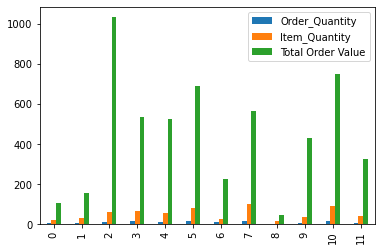

In [21]:
stats_df2.plot.bar()

In [22]:
#Let's take a look at the regions where the summer sale occured.

London_df = prepared_data

grouped = prepared_data.groupby(prepared_data.REGION)
df_London = grouped.get_group("GL")

df_London

stats3 = {'Month':  ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 'Order_Quantity':  [0,0,0,0,0,0,0,0,0,0,0,0],
        'Item_Quantity': [0,0,0,0,0,0,0,0,0,0,0,0],
        'Total Order Value': [0,0,0,0,0,0,0,0,0,0,0,0]}

stats_df3 = pd.DataFrame(stats3)
stats_df3

append_rows(df_London, stats_df3)

,Month,Order_Quantity,Item_Quantity,Total Order Value
0,January,2,16,134
1,Febuary,0,0,0
2,March,3,12,314
3,April,7,40,256
4,May,10,56,516
5,June,8,35,314
6,July,8,41,399
7,August,15,82,719
8,September,4,33,167
9,October,4,31,213


<AxesSubplot:>

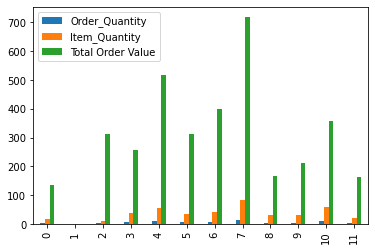

In [23]:
stats_df3.plot.bar()

In [24]:
#Another thing I have just noticed, the 'SUMMERSALE' codes are being used across various different regions, not exclusive to the GL and WM regions where the campaign was targeted
#It may be questioned as to what the cause of this is. Is this either an issue with the CRM system, or an issue with the method of marketing. 
#An initial qualitative analysis based on the first diagram would hint that sales increased significantly overall in August across all regions as a whole
#We could remove the two regions where it is stated to have been advertised though to truly judge this.
#If we still see a large rise in the total order value in August with the GL and WM regions removed then perhaps the advertisement campaign was accidentally put out to other regions.
#Also arguably it can be argued as to which metric is best at representing the effect of advertisement....total order value could be the best given that the promotions were sales.
#We could look at the correlation between these metrics and judge how much of much of a difference they would lead to in the conclusions that they could provide.

#IMPORTANT

#Distinguishing between whether or not the SUMMERSALE messed up or if the CRM system is wrong is vital in understanding how effective the advertisement campaigns were
#So the question of how to distinguish between these facts arises.
#We can look at different regions in various configurations as stated above and whether or not the sales went up in August
#We can look at the frequency of the sale code in each particular region in August as a ratio of its total sales along with how much the sales went up, then compare this figure across different regions. If regions with a higher ratio show a higher increase in sales we can maybe assume that this capaign was to blame.
#If not, maybe we can blame the system 


In [25]:
#Before continuing, lets take a look at which metric is best to measure the effectiveness of the sale. Again, its hard to distinguish whether there is a season element involved that say, for example, means that the ecommerce site sells higher valued products in the summer, but does not have to ability to do so in winter.

#Arguably, the item quantity is somewhat less of an important metric than value of product or order quantity (number of total sales)
#This is because the other two metrics, value and no of orders, can indicate profit, and scope of reach respectively, whereas item quantity is a less accurate metric of determining profit, which ulimately is the true metric of the effectiveness of a sale.

#So, lets see what the correlation is between order quantity and order value.

#First, looking at the full dataset

append_rows(prepared_data, stats_df)


,Month,Order_Quantity,Item_Quantity,Total Order Value
0,January,16,80,662
1,Febuary,15,82,455
2,March,27,142,1771
3,April,48,239,2058
4,May,59,300,3000
5,June,50,268,2249
6,July,40,205,1922
7,August,81,469,3495
8,September,37,207,1785
9,October,31,183,1763


<AxesSubplot:xlabel='Order_Quantity'>

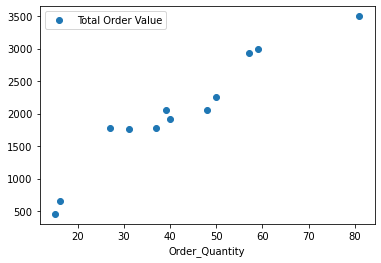

In [26]:
stats_df.plot(x='Order_Quantity', y='Total Order Value', style='o')

In [27]:
#Let's look at the correlation

column_1 = stats_df["Order_Quantity"]
column_2 = stats_df["Total Order Value"]
correlation = column_1.corr(column_2)

In [28]:
correlation

0.9593656216227083

In [29]:
#The result is a highly correlated linear relationship, and thus, it is less immediately important to distinguish which metric is best at predicting the effectiveness of sales
#Which again, we could truly be able to distinguish if we could trust the reliability of the promotion codes used or if we had context/data on the range of 
#...products provided and of their seasonal nature.
#For now, as it is more closely related to profit, and because it inself includes the number of orders, but also contains additional information as to the value of orders, we shall use the total value as the metric
#So the value is the metric used to determine the effectiveness of sales.
#Again, we are trying to determine whether or not the CRM system is inaccurate or the promotion was incorrectly targeted


In [30]:
#The next step, is to compare the ratio of promotion code sales to the increase in order value in the different regions in order to gauge whether there is correlation between the two factors.

#Another question arises, which is when comparing some ratio of promotion code to sales, which metric do we use. In this case we're not trying to compare the EFFECTIVENESS of the 
#...promotion, but just how much the code can be used as a predictor of an increase in the profit. If use of the code predicts highly a large rise in sales, then this speaks to the accuracy of the CRM system in this case
#So, do we use frequency of the code, or fraction of value of the sales from the code sale?


# To answer this, let's consider the eventuality that the CRM system is working regarding the promotion code. IF it is, then the value of the code contains additional information on how effective the code was as previously argued.
# However, if the CRM system has failed, then there has to be some cause of this. IF that cause randomly assigns the codes, then any weighting towards higher/lower values and thus, to scewed ratios, should be cancelled.
# However, if the faulty CRM system has some weighting (towards value) as to the random promotion codes it assigns, then this could scew the data.
# For example, a weighting towards higher values would produce a higher ratio of promotion to total value, and then one may (depending on the degree and extent of correlation) see a greater increase in total value associated 
#..with higher ratios across different regions and wrongly assume that the promotion CRM system is correct, when it is not. 
#However, it is difficult to distinguish a random assigning of codes to higher/lower values, with a natural tendency for people to use the code for higher/lower priced (likely higher) which may exist
#If the distribution of values for promotion sales is random, with an average value near that of the average of the full dataset of values, then we can assume that IF the CRM system is wrong, then it assigns the promotion codes 
#...randomly, and thus we can use the potentially more descriptive metric of the ratio of values, as opposed to the ratio of orders.

#It turns out that the distribution is random (as I have plotted on Excel), with a mean of the promotion code sale values (46.67) very close to the mean of the full set of values (48.31)


#

In [31]:
#So, we use the ratio of value of the promotion code sales to total value, and compare this to the increase in the total value from the previous month, across different regions.

#It is also worth noting however, that not everyone necessarily will have used the promotion code, however we can assume for th sake of scope of the project that
#........the use of the code in proportion to the total effect of the advert is constant across the regions. !

#Analysis was performed on excel, however there was little or no correlation between the ratio of promotion value to total value 

#!!!! INSERT !!!!!

#C:\Users\Alex\OneDrive\Documents\ratios.csv

ratios = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\ratios.csv')
ratios

,Ratio of Promotion Value to Total Value August,Normalised Increase Between July and August
0,0.391478,0.583580
1,0.785651,0.420682
2,0.420330,0.802857
3,0.427441,1.494733
4,0.429373,-0.405680
5,0.550042,0.788495
6,0.283036,-0.481748
7,0.531320,1.429002


<AxesSubplot:xlabel='Ratio of Promotion Value to Total Value August'>

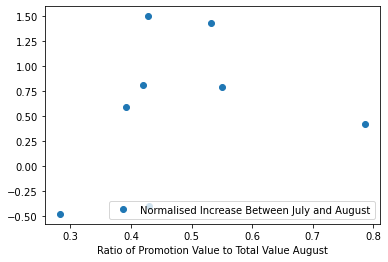

In [32]:
column_11 = ratios["Ratio of Promotion Value to Total Value August"]
column_22 = ratios["Normalised Increase Between July and August"]
correlation2 = column_11.corr(column_22)
correlation2

ratios.plot(x='Ratio of Promotion Value to Total Value August', y='Normalised Increase Between July and August', style='o')

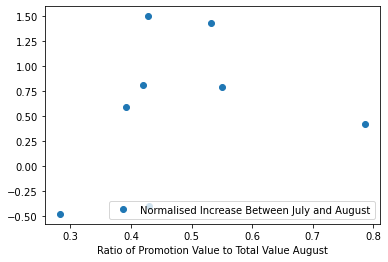

In [33]:
#We see that there is a slight correlation, but it is not very strong. We do notice that there is an outlier when we plot the results though.

ratios.plot(x='Ratio of Promotion Value to Total Value August', y='Normalised Increase Between July and August', style='o')

ratios2 = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\ratios2.csv')

<AxesSubplot:xlabel='Ratio of Promotion Value to Total Value August'>

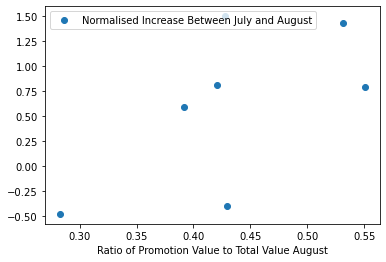

In [34]:
#If we remove this potential outlier (in the EM region) we have the following 

ratios2.plot(x='Ratio of Promotion Value to Total Value August', y='Normalised Increase Between July and August', style='o')

In [35]:
#The correlation is then 


column_111 = ratios2["Ratio of Promotion Value to Total Value August"]
column_222 = ratios2["Normalised Increase Between July and August"]
correlation3 = column_111.corr(column_222)
correlation3

0.6206059490785459

In [36]:
#Which is indeed stronger, and may indictate that generally speaking, there is a larger proportional increase in the sales between July and August in regions 
#.....where the promotion code was used, however, given the unjustified removal of an outlier, and the only somewhat positive correlation, this statement can
#...only be stated with limited confidence.
#However, we can also say that generally speaking, if the advert did indeed run across the different regions, and the CRM system is accurate, then we have the
#..first indications that the SUMMERSALE promotion (generally speaking) boosted sales across the regions.
#Still under this assumption, we could also use the above findings to argue as to which 


#An important point should be made. This analysis thus far on the SUMMERSALE promotion code has been going under the assumption that the instances of 
#the use of the code are not the only sale instances in which the promotion has been effective. This is WHY the analysis of ratio of the promotion value has been
#...compared to the overall increase between July and August.

#IF however, the only instances of which the promotion was effective was when the promotion code was used, then we cannot use this method.
#NOT necessarily true, maybe can use more so?


#!!!!!! It should not be taken as a given that the only times when the promotion boosted sales was when the codes were used. why??? !!!!!!!!!!

#!!!!!!!!! The randomness of the summersale -code and info about a potentially faulty CRM is enough to question the SUMMERSALE codes


#There are other things we can do, initially from a qualitative perspective
#First, we can compare the regions where the code was used to the regions where it was not used whatsoever
#Second, we can compare the regions that the promotion is stated to have been targeted and compare those regions to the others

#Here is the summarised list of July to August summersale data, including the promotion code data

summersale = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\SummerSaleData.csv')
summersale

,Region,Total Value August,Total Code Value August,Ratio Code Value to Total August,Total Value July,July to August ratio,July August Difference,Fraction of J/A Difference to July
0,EE,187.29,73.32,0.391478,118.27,0.631481,69.02,0.583580
1,EM,258.55,203.13,0.785651,181.99,0.703887,76.56,0.420682
2,GL,719.34,302.36,0.420330,399.00,0.554675,320.34,0.802857
3,NW,563.61,240.91,0.427441,225.92,0.400845,337.69,1.494733
4,SC,208.63,89.58,0.429373,351.04,1.682596,-142.41,-0.405680
5,SE,152.97,84.14,0.550042,85.53,0.559129,67.44,0.788495
6,WL,100.80,28.53,0.283036,194.50,1.929563,-93.70,-0.481748
7,WM,612.23,325.29,0.531320,252.05,0.411692,360.18,1.429002
8,SW,138.92,0.00,0.000000,34.22,0.246329,104.70,3.059614
9,YH,219.75,0.00,0.000000,80.20,0.364960,139.55,1.740025


In [37]:
#As can be seen in the final three rows, SW, YH, and NE regions code no uses of the code. However, all three showed a strong rise in the total orders value 
#...between July and August.
#IN fact, the three regions with no use of the code had the largest increase between July and August of ANY of the regions.

#We also have that the two regions that the advert was actually targeted, GL and WM, did have a fairy strong increase in the total order value between July 
#...and August, however, both were less (up to normalisation) than the three regions without the use of the promotion code.

#Where does this leave us? 

August = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\August.csv')
August


,Region,Total Value August,Total Code Value August
0,EE,113.97,73.32
1,EM,55.42,203.13
2,GL,416.98,302.36
3,NW,322.70,240.91
4,SC,119.05,89.58
5,SE,68.83,84.14
6,WL,72.27,28.53
7,WM,286.94,325.29
8,SW,138.92,0.00
9,YH,219.75,0.00


<AxesSubplot:xlabel='Region'>

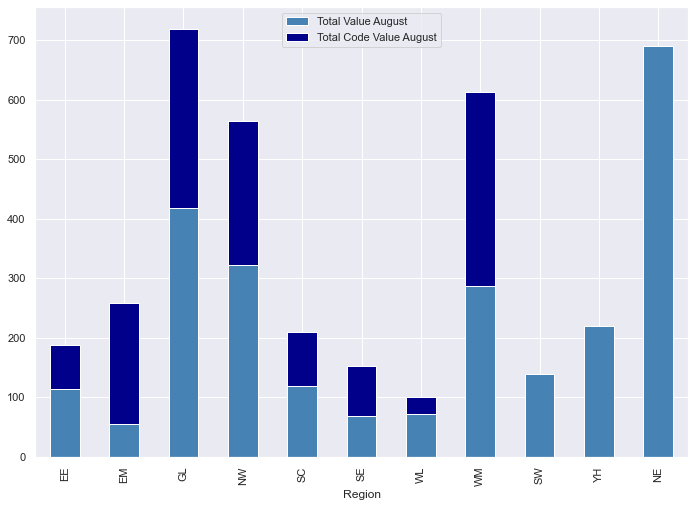

In [51]:
#Need total sales but also total code sales for each region 
a4_dims = (11.7, 8.27)
%matplotlib inline
August.set_index('Region').plot(kind='bar', stacked=True, color=['steelblue', 'darkblue'], figsize=a4_dims)



<AxesSubplot:xlabel='Region'>

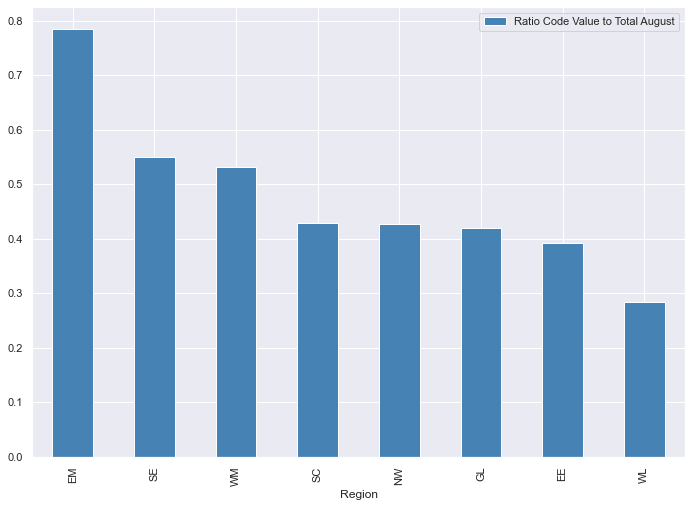

In [53]:
RatioC = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\RatioC.csv')
RatioC.set_index('Region').plot(kind='bar', color=['steelblue', 'darkblue'], figsize=a4_dims)

In [79]:
RatioB = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\RatioB.csv')


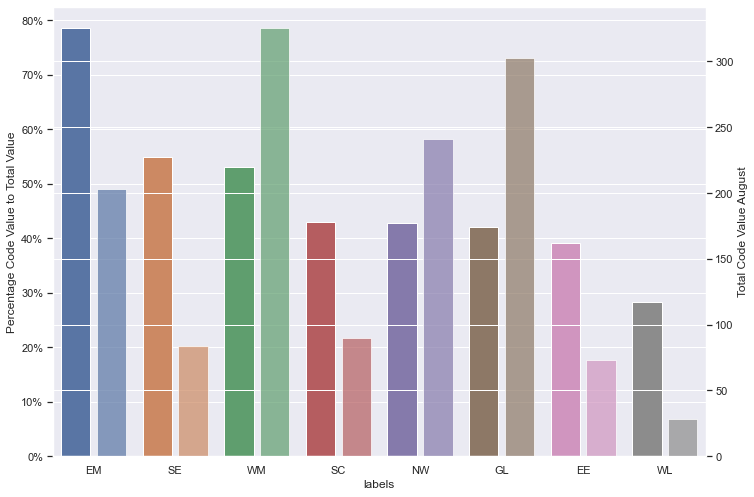

In [82]:

from matplotlib.ticker import PercentFormatter

from io import StringIO

a4_dims = (11.7, 8.27)

x_ = RatioB.columns[0]
y_ = RatioB.columns[1]
y_2 = RatioB.columns[2]

data1 = RatioB[[x_, y_]]
data2 = RatioB[[x_, y_2]]
plt.figure(figsize=(a4_dims))
ax = sns.barplot(x=x_, y=y_, data=data1)
width_scale = 0.45
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
ax.yaxis.set_major_formatter(PercentFormatter(1))

ax2 = ax.twinx()
sns.barplot(x=x_, y=y_2, data=data2, alpha=0.7, ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)

plt.show()


<AxesSubplot:xlabel='Region'>

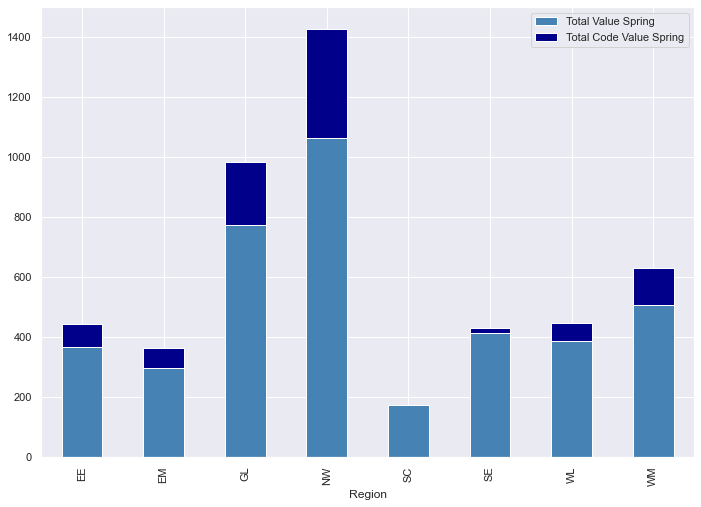

In [83]:
spring = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\spring.csv')

a4_dims = (11.7, 8.27)
%matplotlib inline
spring.set_index('Region').plot(kind='bar', stacked=True, color=['steelblue', 'darkblue'], figsize=a4_dims)


<AxesSubplot:xlabel='Period'>

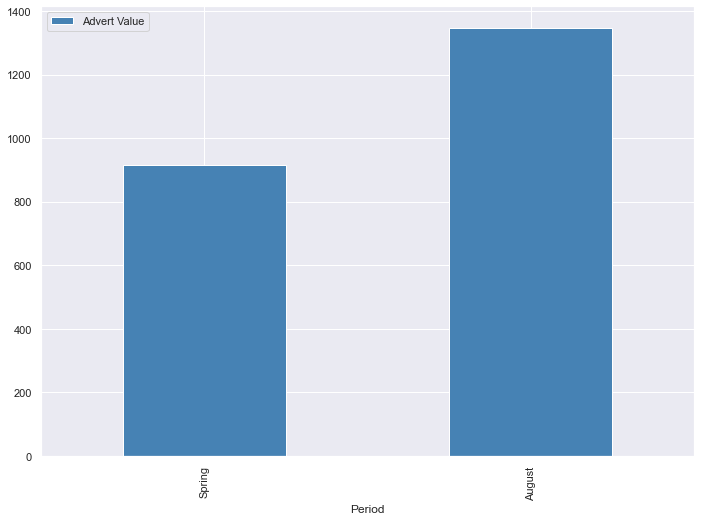

In [86]:
springf = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\sprt.csv')
springf.set_index('Period').plot(kind='bar', color=['steelblue', 'darkblue'], figsize=a4_dims)